In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import hilbert

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


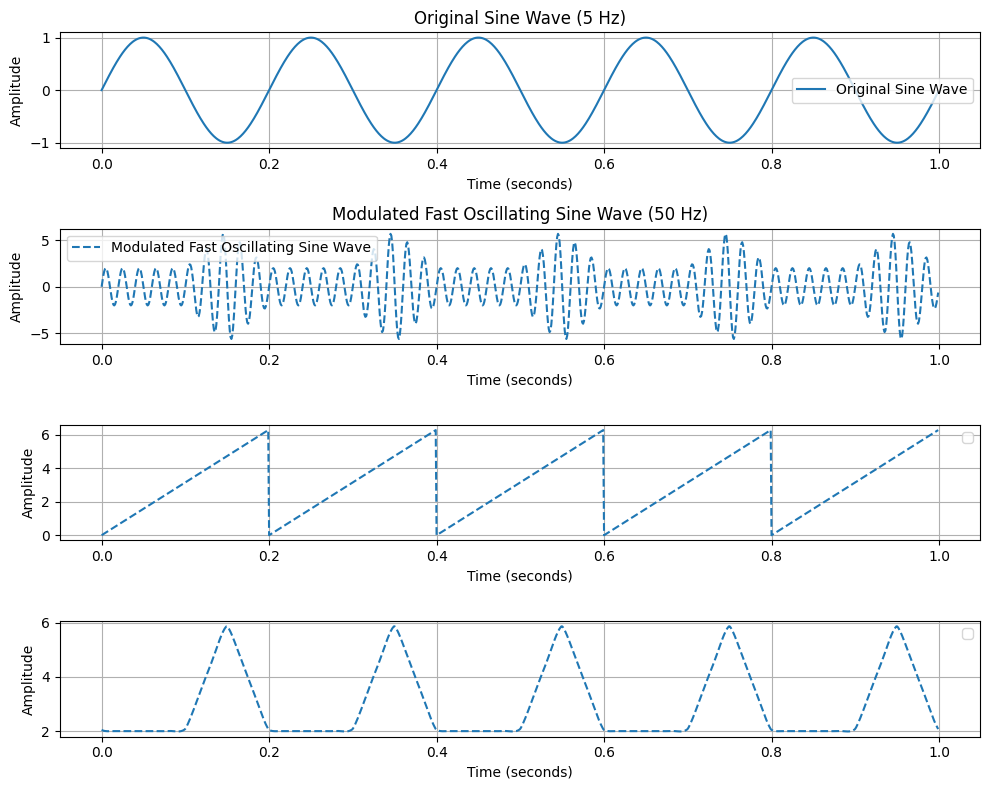

In [2]:
# Set the parameters
amplitude_sine = 1.0   # Amplitude of the original sine wave
frequency_sine = 5.0   # Frequency of the original sine wave in Hz
amplitude_fast = 2.0   # Maximum amplitude of the fast oscillating sine wave near troughs
frequency_fast = 50.0  # Frequency of the fast oscillating sine wave in Hz
duration = 1.0   # Duration of the signal in seconds

# Generate time values
t = np.linspace(0, duration, num=1000, endpoint=False)

# Generate the original sine wave
sine_wave = amplitude_sine * np.sin(2 * np.pi * frequency_sine * t)

# Generate the indices of troughs in the original sine wave
trough_indices = np.where(sine_wave == -1)[0]

# Generate the fast oscillating sine wave with modulated amplitude
fast_sine_wave = amplitude_fast * np.sin(2 * np.pi * frequency_fast * t)

# Modulate the amplitude near troughs
for idx in trough_indices:
    N = fast_sine_wave[idx-50:idx+50].shape[0]
    # Create an array from 1 to 3
    ascending_part = np.linspace(1, 3, N // 2)

    # Create an array from 3 back to 1
    descending_part = np.linspace(3, 1, N // 2)

    # Concatenate the arrays to get the final result
    result_array = np.concatenate((ascending_part, descending_part))

    fast_sine_wave[idx-50:idx+50] *= result_array # Linearly increase amplitude around troughs
    
# Compute the analytic signal using the Hilbert transform
analytic_signal = hilbert(fast_sine_wave)

# Extract the magnitude of the analytic signal (envelope)
envelope = np.abs(analytic_signal)
theta_phase = np.tile(np.linspace(0, 2*np.pi, 200), 5)


# Plot the original sine wave and the modulated fast oscillating sine wave
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(t, sine_wave, label='Original Sine Wave')
plt.title('Original Sine Wave (5 Hz)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(t, fast_sine_wave, label='Modulated Fast Oscillating Sine Wave', linestyle='dashed')
plt.title('Modulated Fast Oscillating Sine Wave (50 Hz)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(t, theta_phase,  linestyle='dashed')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(t, envelope,  linestyle='dashed')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()








In [3]:
def compute_entropy(data_arr):
    import math
    probability_arr = (data_arr/np.sum(data_arr))
    probability_arr = probability_arr[probability_arr!=0]
    negative_vals = probability_arr[probability_arr < 0]
    if negative_vals.shape[0] > 0:
        print(probability_arr)
    if np.all(np.isnan(probability_arr)):
        print(probability_arr)
    entropy = -np.sum(probability_arr*np.log(probability_arr))
    return entropy

In [4]:
def compute_MI(phase, amplitude, nbins=18):
    
    amplitude_binned = []
    phase_binned = np.floor((phase/(2*np.pi))*nbins)

    for p in np.unique(phase_binned):
        
        p_idxs = np.argwhere(phase_binned==p)
        amplitude_p = amplitude[p_idxs]
        amplitude_binned.append(np.mean(amplitude_p))
        
    
    E = compute_entropy(np.array(amplitude_binned))
    U = np.log(nbins)
    MI = (U-E)/U
    return MI, np.array(amplitude_binned)/np.sum(amplitude_binned)

In [34]:
true_MI,  = compute_MI(theta_phase, envelope)

In [31]:
MI_permuted = []
for i in range(500):
    
    split = np.random.randint(100, 900)
    amplitude_permuted = np.concatenate((envelope[split:], envelope[:split]))
    MI_permuted.append(compute_MI(theta_phase, amplitude_permuted))

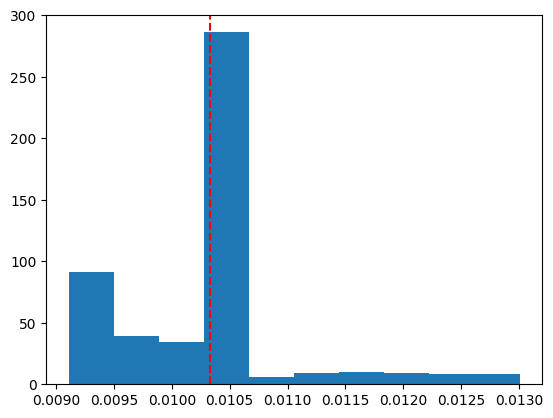

In [37]:
plt.hist(MI_permuted)
plt.axvline(true_MI, linestyle='--', color='r')
plt.show()